In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

# Read data 

In [83]:
df_labels = pd.read_csv("dataset/train.csv")
df_photo_to_biz = pd.read_csv("dataset/train_photo_to_biz_ids.csv")
df = df_photo_to_biz.join(other=df_labels.set_index('business_id'), how='left', on='business_id').drop(columns="business_id")

In [84]:
df

,photo_id,labels
0,204149,3 8
1,52779,1 2 3 5 6 7
2,278973,1 2 3 4 5 6 7
3,195284,1 2 3 4 5 6 7
4,19992,1 2 3 4 5 6 7
...,...,...
234837,325414,1 4 5 6 7
234838,301030,1 2 5 6
234839,355839,1 2 5 6 7 8
234840,20474,0 1 2 3 5 6 7 8


In [85]:
print(df.isnull().sum().sum())

297


In [86]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [87]:
df

,photo_id,labels
0,204149,3 8
1,52779,1 2 3 5 6 7
2,278973,1 2 3 4 5 6 7
3,195284,1 2 3 4 5 6 7
4,19992,1 2 3 4 5 6 7
...,...,...
234540,325414,1 4 5 6 7
234541,301030,1 2 5 6
234542,355839,1 2 5 6 7 8
234543,20474,0 1 2 3 5 6 7 8


Business attributes, that corresponds to labels:

0: good_for_lunch

1: good_for_dinner

2: takes_reservations

3: outdoor_seating

4: restaurant_is_expensive

5: has_alcohol

6: has_table_service

7: ambience_is_classy

8: good_for_kids


In [88]:
LABELS_NUM = 9

In [89]:
def encode_label(l):
    res = np.zeros(LABELS_NUM)
    for i in l:
        res[i] = 1
    return res

train_L = np.vstack(df['labels'].apply(lambda x: tuple(sorted(int(t) for t in x.split()))).apply(encode_label))
df = pd.concat([df, pd.DataFrame(train_L)], axis=1).drop(columns=["labels"])
df

,photo_id,0,1,2,3,4,5,6,7,8
0,204149,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,52779,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
2,278973,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
3,195284,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
4,19992,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
234540,325414,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0
234541,301030,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
234542,355839,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
234543,20474,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0


In [92]:
def show_image(opencv_image):
    b,g,r = cv2.split(opencv_image)
    rgb_image = cv2.merge([r,g,b])
    plt.imshow(rgb_image)
    plt.show()

In [99]:
def get_img(img_id):
    return cv2.imread("dataset/train_photos/" + str(img_id) + ".jpg")

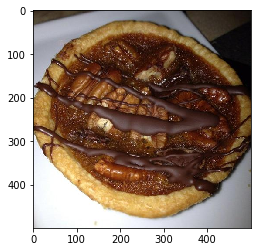

In [101]:
show_image(get_img(int(df.sample(1).photo_id)))

# Feature extraction